In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
pd.options.display.float_format = "{:.3f}".format
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internalgelsd")

In [35]:
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv")
df = pd.read_csv(data_path, header=4)

In [36]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0.000,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,"2,577",3,0.000,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,"2,846",3,0.000,nan,0,0,3,16,1,15,0,0.000
3,Albany,"97,956",791,8.000,nan,30,227,526,"4,090",705,"3,243",142,nan
4,Albion Village,"6,388",23,0.000,nan,3,4,16,223,53,165,5,nan


In [37]:
df.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object')

In [38]:
def murder(c):
    if c["Murder and\nnonnegligent\nmanslaughter"] > 0:
        return 1
    elif c["Murder and\nnonnegligent\nmanslaughter"] == 0:
        return 0
    

In [39]:
df["murder"] = df.apply(murder, axis=1)

In [40]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,murder
0,Adams Village,"1,861",0,0.000,nan,0,0,0,12,2,10,0,0.000,0.000
1,Addison Town and Village,"2,577",3,0.000,nan,0,0,3,24,3,20,1,0.000,0.000
2,Akron Village,"2,846",3,0.000,nan,0,0,3,16,1,15,0,0.000,0.000
3,Albany,"97,956",791,8.000,nan,30,227,526,"4,090",705,"3,243",142,nan,1.000
4,Albion Village,"6,388",23,0.000,nan,3,4,16,223,53,165,5,nan,0.000


In [41]:
df.dtypes

City                                       object
Population                                 object
Violent\ncrime                             object
Murder and\nnonnegligent\nmanslaughter    float64
Rape\n(revised\ndefinition)1              float64
Rape\n(legacy\ndefinition)2                object
Robbery                                    object
Aggravated\nassault                        object
Property\ncrime                            object
Burglary                                   object
Larceny-\ntheft                            object
Motor\nvehicle\ntheft                      object
Arson3                                    float64
murder                                    float64
dtype: object

In [46]:
df["Population"].head()

0     1,861
1     2,577
2     2,846
3    97,956
4     6,388
Name: Population, dtype: object

In [53]:
df["Population"] = df["Population"].str.replace(",", "")

In [54]:
s = "1,861"
s = s.replace(",", "")
print(s)

1861


In [55]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,murder
0,Adams Village,1861,0,0.000,nan,0,0,0,12,2,10,0,0.000,0.000
1,Addison Town and Village,2577,3,0.000,nan,0,0,3,24,3,20,1,0.000,0.000
2,Akron Village,2846,3,0.000,nan,0,0,3,16,1,15,0,0.000,0.000
3,Albany,97956,791,8.000,nan,30,227,526,"4,090",705,"3,243",142,nan,1.000
4,Albion Village,6388,23,0.000,nan,3,4,16,223,53,165,5,nan,0.000


In [57]:
df["Population"] = pd.to_numeric(df["Population"])

In [64]:
df["Robbery"] = df["Robbery"].str.replace(",", "")

In [65]:
df["Robbery"] = pd.to_numeric(df["Robbery"])

In [87]:
df["Property\ncrime"] = df["Property\ncrime"].str.replace(",", "")

df["Property\ncrime"] = pd.to_numeric(df["Property\ncrime"])

In [88]:
df.dtypes

City                                       object
Population                                float64
Violent\ncrime                             object
Murder and\nnonnegligent\nmanslaughter    float64
Rape\n(revised\ndefinition)1              float64
Rape\n(legacy\ndefinition)2                object
Robbery                                   float64
Aggravated\nassault                        object
Property\ncrime                           float64
Burglary                                   object
Larceny-\ntheft                            object
Motor\nvehicle\ntheft                      object
Arson3                                    float64
murder                                    float64
Pop_Squared                               float64
robbery                                   float64
dtype: object

In [89]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,murder,Pop_Squared,robbery
0,Adams Village,1861.000,0,0.000,nan,0,0.000,0,12.000,2,10,0,0.000,0.000,3463321.000,0.000
1,Addison Town and Village,2577.000,3,0.000,nan,0,0.000,3,24.000,3,20,1,0.000,0.000,6640929.000,0.000
2,Akron Village,2846.000,3,0.000,nan,0,0.000,3,16.000,1,15,0,0.000,0.000,8099716.000,0.000
3,Albany,97956.000,791,8.000,nan,30,227.000,526,4090.000,705,"3,243",142,nan,1.000,9595377936.000,1.000
4,Albion Village,6388.000,23,0.000,nan,3,4.000,16,223.000,53,165,5,nan,0.000,40806544.000,1.000


In [68]:
df["Pop_Squared"] = df["Population"] ** 2

In [69]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,murder,Pop_Squared
0,Adams Village,1861.000,0,0.000,nan,0,0.000,0,12,2,10,0,0.000,0.000,3463321.000
1,Addison Town and Village,2577.000,3,0.000,nan,0,0.000,3,24,3,20,1,0.000,0.000,6640929.000
2,Akron Village,2846.000,3,0.000,nan,0,0.000,3,16,1,15,0,0.000,0.000,8099716.000
3,Albany,97956.000,791,8.000,nan,30,227.000,526,"4,090",705,"3,243",142,nan,1.000,9595377936.000
4,Albion Village,6388.000,23,0.000,nan,3,4.000,16,223,53,165,5,nan,0.000,40806544.000


In [70]:
def robbery(c):
    if c["Robbery"] > 0:
        return 1
    elif c["Robbery"] == 0:
        return 0
    
df["robbery"] = df.apply(robbery, axis=1)
    

In [71]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,murder,Pop_Squared,robbery
0,Adams Village,1861.000,0,0.000,nan,0,0.000,0,12,2,10,0,0.000,0.000,3463321.000,0.000
1,Addison Town and Village,2577.000,3,0.000,nan,0,0.000,3,24,3,20,1,0.000,0.000,6640929.000,0.000
2,Akron Village,2846.000,3,0.000,nan,0,0.000,3,16,1,15,0,0.000,0.000,8099716.000,0.000
3,Albany,97956.000,791,8.000,nan,30,227.000,526,"4,090",705,"3,243",142,nan,1.000,9595377936.000,1.000
4,Albion Village,6388.000,23,0.000,nan,3,4.000,16,223,53,165,5,nan,0.000,40806544.000,1.000


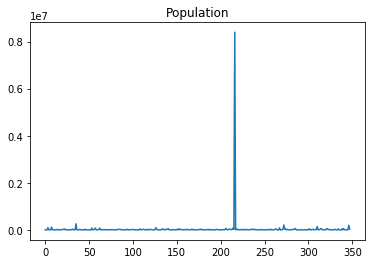

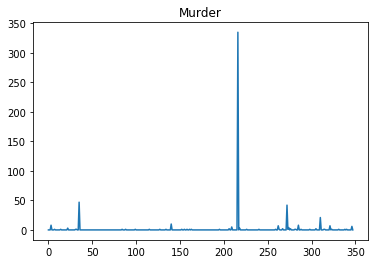

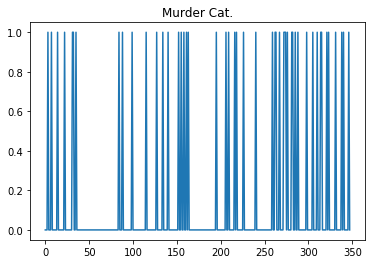

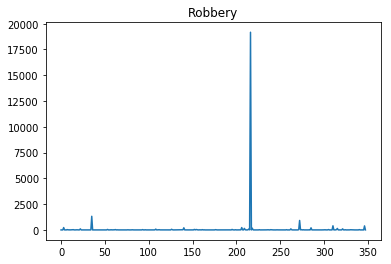

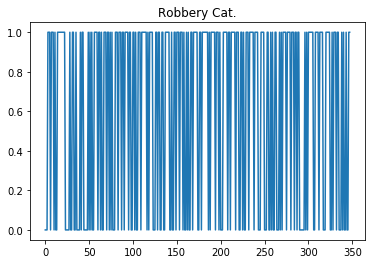

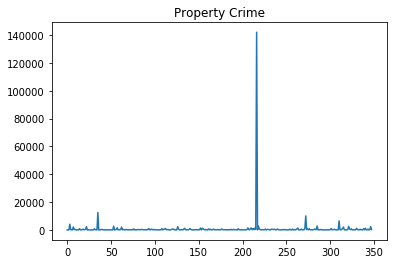

In [90]:

plt.plot(df["Population"])
plt.title("Population")
plt.show()

plt.plot(df["Murder and\nnonnegligent\nmanslaughter"])
plt.title("Murder")
plt.show()
          
plt.plot(df["murder"])
plt.title("Murder Cat.")
plt.show()

plt.plot(df["Robbery"])
plt.title("Robbery")
plt.show()

plt.plot(df["robbery"])
plt.title("Robbery Cat.")
plt.show()

plt.plot(df["Property\ncrime"])
plt.title("Property Crime")
plt.show()

In [91]:
df.describe()

,Population,Murder and nonnegligent manslaughter,Rape (revised definition)1,Robbery,Property crime,Arson3,murder,Pop_Squared,robbery
count,348.000,348.000,0.000,348.000,348.000,187.000,348.000,348.000,348.000
mean,40037.632,1.566,nan,72.902,792.606,1.872,0.141,203554650960.236,0.601
std,450037.368,18.304,nan,1031.033,7659.725,10.693,0.348,3778875542708.130,0.490
min,526.000,0.000,nan,0.000,0.000,0.000,0.000,276676.000,0.000
25%,3003.000,0.000,nan,0.000,40.500,0.000,0.000,9018117.000,0.000
50%,7233.500,0.000,nan,1.000,112.500,0.000,0.000,52325684.500,1.000
75%,18427.500,0.000,nan,5.000,341.000,1.000,0.000,339753567.000,1.000
max,8396126.000,335.000,nan,19170.000,141971.000,132.000,1.000,70494931807876.000,1.000


In [86]:
df[df["Robbery"] > 100]

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,murder,Pop_Squared,robbery
3,Albany,97956.000,791,8.000,nan,30,227.000,526,"4,090",705,"3,243",142,nan,1.000,9595377936.000,1.000
22,Binghamton,46304.000,284,3.000,nan,19,101.000,161,"2,349",525,"1,767",57,nan,1.000,2144060416.000,1.000
35,Buffalo,258789.000,"3,249",47.000,nan,145,1322.000,"1,735","12,491","3,458","8,076",957,nan,1.000,66971746521.000,1.000
140,Hempstead Village,55198.000,433,10.000,nan,3,204.000,216,958,206,630,122,2.000,1.000,3046819204.000,1.000
206,Mount Vernon,68071.000,554,2.000,nan,7,228.000,317,"1,436",317,972,147,nan,1.000,4633661041.000,1.000
209,Newburgh,28571.000,435,5.000,nan,21,150.000,259,"1,040",304,673,63,15.000,1.000,816302041.000,1.000
216,New York,8396126.000,"52,384",335.000,nan,"1,112",19170.000,"31,767","141,971","16,606","117,931","7,434",nan,1.000,70494931807876.000,1.000
218,Niagara Falls,49574.000,584,3.000,nan,12,166.000,403,"2,807",746,"1,949",112,22.000,1.000,2457581476.000,1.000
272,Rochester,210562.000,"2,107",42.000,nan,92,918.000,"1,055","10,051","2,587","6,855",609,132.000,1.000,44336355844.000,1.000
285,Schenectady,66041.000,607,8.000,nan,31,203.000,365,"2,800",769,"1,878",153,nan,1.000,4361413681.000,1.000


In [92]:
features = df[["Population", "Pop_Squared", "murder", "robbery", "Property\ncrime"]]

In [93]:
features.head()

,Population,Pop_Squared,murder,robbery,Property crime
0,1861.000,3463321.000,0.000,0.000,12.000
1,2577.000,6640929.000,0.000,0.000,24.000
2,2846.000,8099716.000,0.000,0.000,16.000
3,97956.000,9595377936.000,1.000,1.000,4090.000
4,6388.000,40806544.000,0.000,1.000,223.000
